In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import matplotlib.pyplot as plt

import numpy as np

import denoise
import noise_estimator
import util_plot
#import caiman as cm

In [2]:
from skimage import io
mov = io.imread('example_movies/demoMovie.tif').transpose([1,2,0])
print(mov.shape)

(60, 80, 2000)


In [3]:
mov_wf = denoise.spatial(mov, gHalf=[2,2])

first 0/4800 pixels
first 1000/4800 pixels
first 2000/4800 pixels
first 3000/4800 pixels
first 4000/4800 pixels


In [9]:
noise_level = denoise.noise_level(mov_wf,
                                  range_ff=[0.25,0.5])
mov_nn = mov_wf/noise_level[:,:,np.newaxis]

In [5]:
# spatially decimate

3

In [84]:
from skimage.transform import downscale_local_mean
#ds = 2
#mov_nn2 = downscale_local_mean(mov_nn, (ds, ds, 1))

In [85]:
data_all = mov_nn[:10,:10,:]

In [86]:
if data_all.ndim == 3:
    dims = data_all.shape # d1 x d2 x T
    data_all = data_all.reshape((np.prod(dims[:2]),dims[2]), order='F')
data_all = data_all.T.astype('float32')


In [237]:
data = data_all.copy()
# Remove the mean
mu = data.mean(0, keepdims=True)
data = data - mu
data0=data.copy()

In [238]:
# spatially decimate
data0_ds = gpca.spatial_decimation(data0,
                        ds=ds,
                        dims=dims)
    
pca_method='vanilla'
U, s, Vt = gpca.compute_svd(data0_ds.T,
                        method=pca_method)

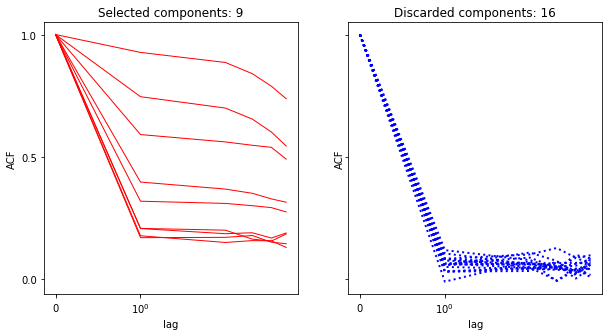

In [239]:
confidence=0.99
corr=True
iterate=False
kurto=False
maxlag=5
mean_th=None
mean_th_factor=1.5
plot_en=True
stim_knots=None
stim_delta=200
keep1 = gpca.find_temporal_component(Vt,
                                    confidence=confidence,
                                    corr=corr,
                                    iterate=iterate,
                                    kurto=kurto,
                                    maxlag=maxlag,
                                    mean_th=mean_th,
                                    mean_th_factor=mean_th_factor,
                                    plot_en=plot_en,
                                    stim_knots=stim_knots,
                                    stim_delta=stim_delta
                                    )
 

In [241]:
U_2, Vt_2 = gpca.decimation_interpolation(data0_ds.T,
                            dims=dims,
                            ds=ds,
                            tsub=tsub,
                            rank=len(keep1)
                            )

In [247]:
U[:,keep1].dot(np.diag(s[keep1])).shape

(25, 9)

In [248]:
U_2[:,:,im].shape

(50, 50)

In [242]:
for im in range(len(keep1)):
    plt.imshow(U_2[:,:,im])
    plt.show()

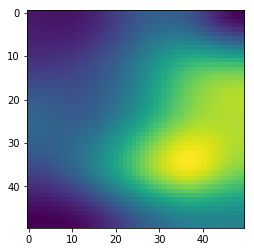

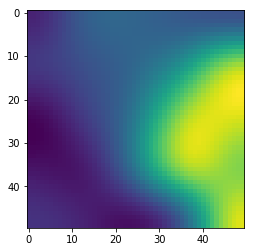

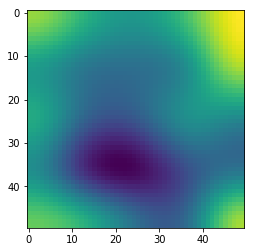

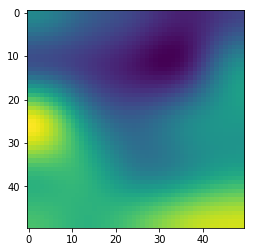

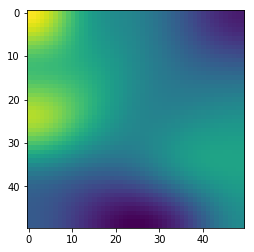

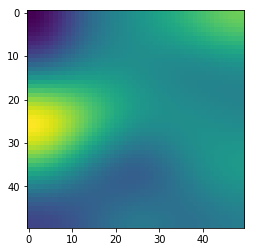

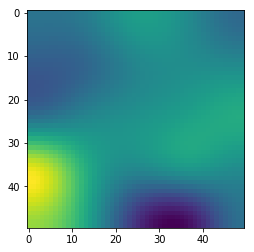

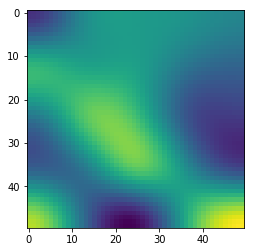

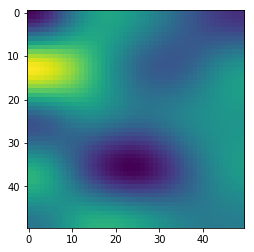

In [242]:
for im in range(len(keep1)):
    plt.imshow(U_2[:,:,im])
    plt.show()

In [202]:
x_interp=np.linspace(0,dims[2],dims[2])

In [207]:
xp_ = x_interp[::tsub]

In [208]:
Vt_2.shape

(9, 1000)

In [209]:
yp_ = Vt_2[0,:]

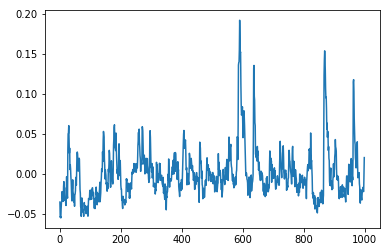

In [218]:
plt.plot(yp_)

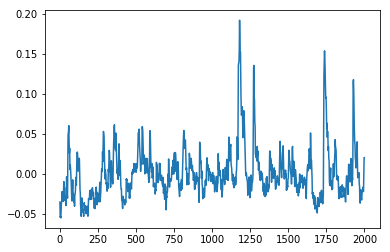

In [217]:
plt.plot(np.interp(x_interp,xp_,yp_))

In [74]:
import greedyPCA as gpca
ds=2
data0_ds = gpca.spatial_decimation(data0,
                        ds=ds,
                        dims=dims)

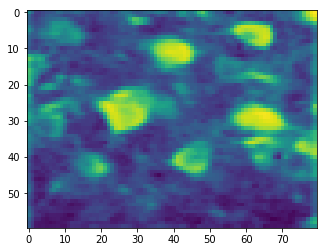

In [11]:
plt.imshow(util_plot.local_correlations_fft(mov_nn))

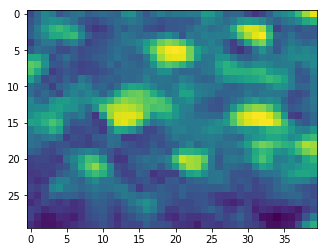

In [24]:
plt.imshow(util_plot.local_correlations_fft(mov_nn2))

In [30]:
mov_nn2.shape

(30, 40, 2000)

In [28]:
mov_nn2.reshape()

(30, 40, 2000)